In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
df_ml = pd.read_csv('/content/drive/MyDrive/ST4248 Project/dataset/hotel_data.csv')

In [4]:
df_ml.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 117082 entries, 0 to 117081
Data columns (total 39 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           117082 non-null  object 
 1   is_canceled                     117082 non-null  object 
 2   lead_time                       117082 non-null  int64  
 3   arrival_date_year               117082 non-null  int64  
 4   arrival_date_month              117082 non-null  object 
 5   arrival_date_week_number        117082 non-null  int64  
 6   arrival_date_day_of_month       117082 non-null  int64  
 7   stays_in_weekend_nights         117082 non-null  int64  
 8   stays_in_week_nights            117082 non-null  int64  
 9   adults                          117082 non-null  int64  
 10  children                        117082 non-null  int64  
 11  babies                          117082 non-null  int64  
 12  meal            

In [5]:
from sklearn.preprocessing import LabelEncoder

def encode_dataframe(df):
    """
    Automatically encode a dataframe that has both continuous and categorical features.
    Uses a combination of Label Encoding and One-Hot Encoding.
    Returns the encoded dataframe.
    """
    # separate the categorical and numerical features
    categorical_features = df.select_dtypes(include=['object', "bool"]).columns
    
    # encode categorical features with Label Encoding
    label_encoder = LabelEncoder()
    for feature in categorical_features:
        df[feature] = label_encoder.fit_transform(df[feature])
    
    return df


In [6]:
from sklearn.preprocessing import LabelEncoder

df_encoded = df_ml.copy()

df_encoded = encode_dataframe(df_encoded)

In [ ]:
df_encoded.head(n = 5)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,total_of_special_requests,reservation_status,reservation_status_date,num.guests,pre.cancel.ratio,has.minor,stays,is_company_paid,is_holiday_season,get_reserved
0,1,1,7,2015,5,27,1,0,1,1,...,0,1,120,1,NaN,0,1,0,1,0
1,1,1,13,2015,5,27,1,0,1,1,...,0,1,120,1,NaN,0,1,0,1,1
2,1,1,14,2015,5,27,1,0,2,2,...,1,1,121,2,NaN,0,2,0,1,1
3,1,1,14,2015,5,27,1,0,2,2,...,1,1,121,2,NaN,0,2,0,1,1
4,1,1,0,2015,5,27,1,0,2,2,...,0,1,121,2,NaN,0,2,0,1,1


In [15]:
y = df_encoded.is_canceled 
X = df_encoded.drop('is_canceled', axis=1)

In [16]:
X = X.drop(["pre.cancel.ratio", "agent", "company", "country", "reservation_status", "reservation_status_date", "country"], axis = 1)

In [18]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 117082 entries, 0 to 117081
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           117082 non-null  int64  
 1   lead_time                       117082 non-null  int64  
 2   arrival_date_year               117082 non-null  int64  
 3   arrival_date_month              117082 non-null  int64  
 4   arrival_date_week_number        117082 non-null  int64  
 5   arrival_date_day_of_month       117082 non-null  int64  
 6   stays_in_weekend_nights         117082 non-null  int64  
 7   stays_in_week_nights            117082 non-null  int64  
 8   adults                          117082 non-null  int64  
 9   children                        117082 non-null  int64  
 10  babies                          117082 non-null  int64  
 11  meal                            117082 non-null  int64  
 12  market_segment  

In [19]:
X.describe()

,hotel,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,...,customer_type,adr,required_car_parking_spaces,total_of_special_requests,num.guests,has.minor,stays,is_company_paid,is_holiday_season,get_reserved
count,117082.000000,117082.000000,117082.000000,117082.000000,117082.000000,117082.000000,117082.000000,117082.000000,117082.000000,117082.000000,...,117082.000000,117082.000000,117082.000000,117082.000000,117082.000000,117082.000000,117082.000000,117082.000000,117082.000000,117082.000000
mean,0.334022,105.328180,2016.160409,5.487086,27.140039,15.804291,0.937036,2.522540,1.861183,0.104465,...,2.136460,103.530017,0.062375,0.570839,1.973343,0.078535,3.459575,0.054329,0.420662,0.880280
std,0.471650,106.931727,0.706357,3.535781,13.565371,8.781134,0.994608,1.889512,0.481203,0.398699,...,0.577984,46.683898,0.244995,0.791333,0.644730,0.269012,2.528706,0.226668,0.493668,0.324635
min,0.000000,0.000000,2015.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.260000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000
25%,0.000000,19.000000,2016.000000,2.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,...,2.000000,70.690000,0.000000,0.000000,2.000000,0.000000,2.000000,0.000000,0.000000,1.000000
50%,0.000000,71.000000,2016.000000,6.000000,27.000000,16.000000,1.000000,2.000000,2.000000,0.000000,...,2.000000,95.000000,0.000000,0.000000,2.000000,0.000000,3.000000,0.000000,0.000000,1.000000
75%,1.000000,162.000000,2017.000000,8.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,...,2.000000,126.000000,0.000000,1.000000,2.000000,0.000000,4.000000,0.000000,1.000000,1.000000
max,1.000000,709.000000,2017.000000,11.000000,53.000000,31.000000,19.000000,50.000000,4.000000,3.000000,...,3.000000,510.000000,8.000000,5.000000,5.000000,1.000000,69.000000,1.000000,1.000000,1.000000


/usr/local/lib/python3.9/dist-packages/sklearn/metrics/cluster/_supervised.py:64: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and binary values for target
  warnings.warn(msg, UserWarning)


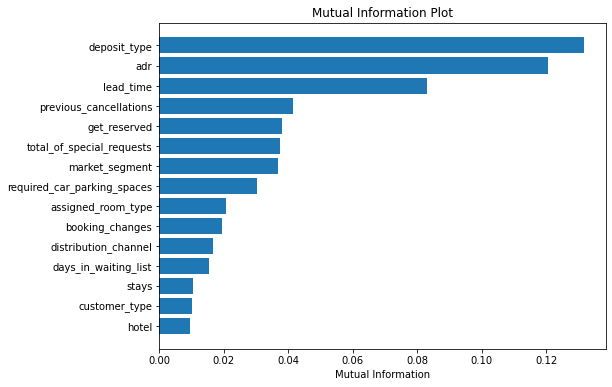

In [21]:
from sklearn.feature_selection import mutual_info_classif

# Compute mutual information between each feature in X and y
mutual_info = mutual_info_classif(X, y, random_state=42, discrete_features = True)

# Sort features by mutual information score
indices = mutual_info.argsort()[::-1][:15]  # Select top 15 features only

# Plot the feature importance bar graph
fig, ax = plt.subplots(figsize=(8,6))

# Get feature names
feature_names = X.columns

# Flip coordinates and plot bar chart
ax.barh(range(len(indices)), mutual_info[indices])
ax.set_yticks(range(len(indices)))
ax.set_yticklabels(np.array(feature_names)[indices])
ax.invert_yaxis()
ax.set_xlabel('Mutual Information')
ax.set_title('Mutual Information Plot')

plt.show()

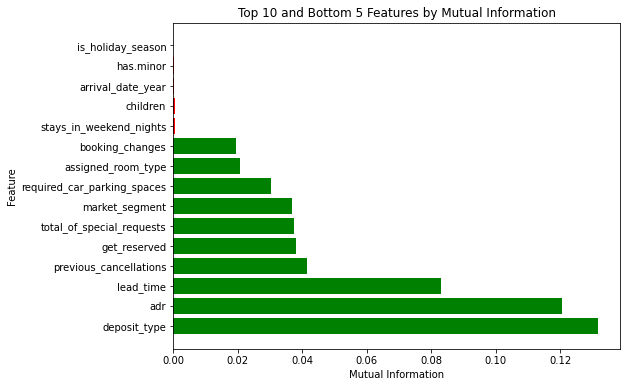

In [23]:
# combine feature names and scores into a pandas DataFrame and sort by scores
mi_df = pd.DataFrame({'feature': X.columns, 'mi_score': mutual_info}).sort_values(by='mi_score', ascending=False)

# select top 10 and bottom 5 features
top_features = mi_df.head(10)
bottom_features = mi_df.tail(5)

# plot horizontal bar chart with most important feature on top
fig, ax = plt.subplots(figsize=(8, 6))
ax.barh(top_features['feature'], top_features['mi_score'], color='green')
ax.barh(bottom_features['feature'], bottom_features['mi_score'], color='red')
ax.set_xlabel('Mutual Information')
ax.set_ylabel('Feature')
ax.set_title('Top 10 and Bottom 5 Features by Mutual Information')
plt.show()

In [24]:
mi_df

,feature,mi_score
20,deposit_type,0.131840
23,adr,0.120677
1,lead_time,0.082919
15,previous_cancellations,0.041442
31,get_reserved,0.038092
25,total_of_special_requests,0.037544
12,market_segment,0.036692
24,required_car_parking_spaces,0.030416
18,assigned_room_type,0.020606
19,booking_changes,0.019513


#### Train-Test Split

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,random_state=42)

In [ ]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 81957 entries, 43549 to 15795
Data columns (total 32 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   hotel                           81957 non-null  int64  
 1   lead_time                       81957 non-null  int64  
 2   arrival_date_year               81957 non-null  int64  
 3   arrival_date_month              81957 non-null  int64  
 4   arrival_date_week_number        81957 non-null  int64  
 5   arrival_date_day_of_month       81957 non-null  int64  
 6   stays_in_weekend_nights         81957 non-null  int64  
 7   stays_in_week_nights            81957 non-null  int64  
 8   adults                          81957 non-null  int64  
 9   children                        81957 non-null  int64  
 10  babies                          81957 non-null  int64  
 11  meal                            81957 non-null  int64  
 12  market_segment              

In [ ]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 35125 entries, 103439 to 56824
Data columns (total 32 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   hotel                           35125 non-null  int64  
 1   lead_time                       35125 non-null  int64  
 2   arrival_date_year               35125 non-null  int64  
 3   arrival_date_month              35125 non-null  int64  
 4   arrival_date_week_number        35125 non-null  int64  
 5   arrival_date_day_of_month       35125 non-null  int64  
 6   stays_in_weekend_nights         35125 non-null  int64  
 7   stays_in_week_nights            35125 non-null  int64  
 8   adults                          35125 non-null  int64  
 9   children                        35125 non-null  int64  
 10  babies                          35125 non-null  int64  
 11  meal                            35125 non-null  int64  
 12  market_segment             

### Test on ML algos

In [ ]:
### Helper method

from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        
    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="black" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

### DT

--------Decision Tree--------
29014
Accuracy Score is 0.82602
Recall Score is 0.85562
Precision Score is 0.86356
F1 Score is 0.85957
       0      1
0  10311   2955
1   3156  18703
[[0.77725011 0.22274989]
 [0.14437989 0.85562011]]


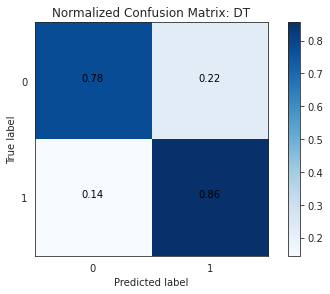

In [ ]:
print("--------Decision Tree--------")
from sklearn.tree import DecisionTreeClassifier
model_dt = DecisionTreeClassifier(random_state = 42)

model_dt.fit(X_train, y_train)

y_predict = model_dt.predict(X_test)
print(sum(y_predict == y_test))
print('Accuracy Score is {:.5}'.format(accuracy_score(y_test, y_predict)))
print('Recall Score is {:.5}'.format(recall_score(y_test, y_predict)))
print('Precision Score is {:.5}'.format(precision_score(y_test, y_predict)))
print('F1 Score is {:.5}'.format(f1_score(y_test, y_predict)))
print(pd.DataFrame(confusion_matrix(y_test,y_predict)))

sns.set_style('white') 
class_names = ['0','1']
plot_confusion_matrix(confusion_matrix(y_test,y_predict),
                      classes= class_names, normalize = True, 
                      title='Normalized Confusion Matrix: DT')

In [ ]:
importances = model_dt.feature_importances_

# Get the names of the features
feature_names = X.columns

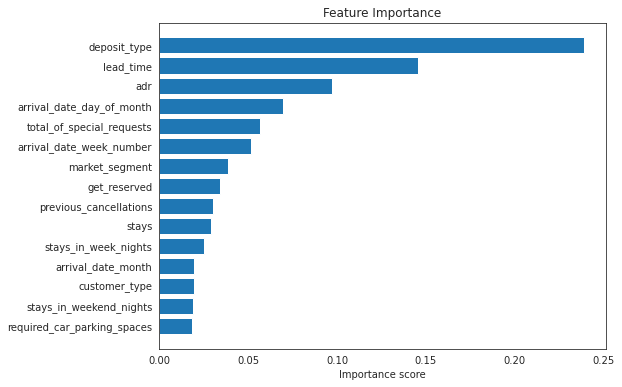

In [ ]:
# Plot the feature importance bar graph
fig, ax = plt.subplots(figsize=(8,6))

# Sort features by importance score
indices = np.argsort(importances)[::-1]
indices = indices[:15]  # Select top 10 features only

# Flip coordinates and plot bar chart
ax.barh(range(len(indices)), importances[indices])
ax.set_yticks(range(len(indices)))
ax.set_yticklabels(np.array(feature_names)[indices])
ax.invert_yaxis()
ax.set_xlabel('Importance score')
ax.set_title('Feature Importance')

plt.show()

### LightGBM

--------LGBM--------
29533
Accuracy Score is 0.8408
Recall Score is 0.92548
Precision Score is 0.83619
F1 Score is 0.87857
      0      1
0  9303   3963
1  1629  20230
[[0.7012664  0.2987336 ]
 [0.07452308 0.92547692]]


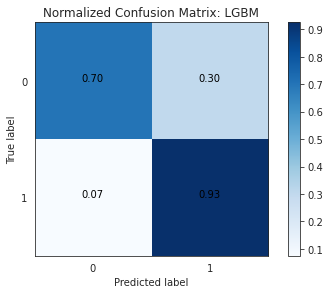

In [ ]:
print("--------LGBM--------")
import lightgbm as lgb
model_lgb = lgb.LGBMClassifier(random_state = 42)
model_lgb.fit(X_train, y_train)


y_predict = model_lgb.predict(X_test)
print(sum(y_predict == y_test)) # Correctly predicted instances
print('Accuracy Score is {:.5}'.format(accuracy_score(y_test, y_predict)))
print('Recall Score is {:.5}'.format(recall_score(y_test, y_predict)))
print('Precision Score is {:.5}'.format(precision_score(y_test, y_predict)))
print('F1 Score is {:.5}'.format(f1_score(y_test, y_predict)))
print(pd.DataFrame(confusion_matrix(y_test,y_predict)))

sns.set_style('white') 
class_names = ['0','1']
plot_confusion_matrix(confusion_matrix(y_test,y_predict),
                      classes= class_names, normalize = True, 
                      title='Normalized Confusion Matrix: LGBM')

<AxesSubplot:title={'center':'Feature importance'}, xlabel='Feature importance', ylabel='Features'>

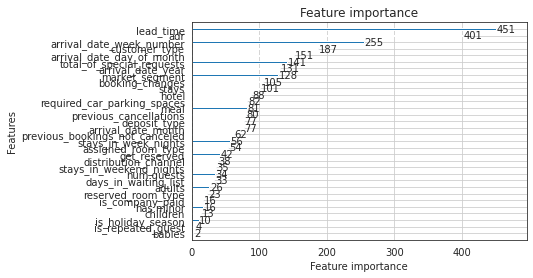

In [ ]:
lgb.plot_importance(model_lgb)